<a href="https://colab.research.google.com/github/ayaka-honda/lesson_ai/blob/master/Preprocessing(Titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set()
%precision 3
from sklearn.preprocessing import StandardScaler

データの読み込み

In [3]:
# データの読み込み
data_original=pd.read_csv('train.csv')
data=data_original.copy()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 基礎統計量を確認
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# 中央値を確認
data.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [32]:
# 相関関係を確認
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193
Age,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938
SibSp,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000


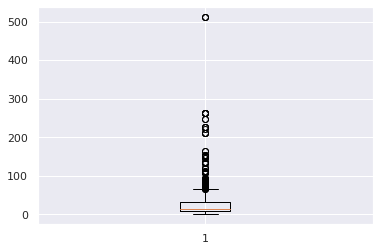

In [6]:
# 箱ひげ図で'Fare'の分布を確認
plt.boxplot(data['Fare'])
plt.show()

In [7]:
# Pclassごとの平均値を確認
data.groupby('Pclass').mean()
## SurvivedはPclassに比例する
## AgeはPclassに比例する
## FareはPcassに比例する→使用しない
## Pclass３→家族連れが多い＆生存率が低い

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [8]:
# trainデータの欠損値確認
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# テストデータの読み込みと欠損値確認
test_original=pd.read_csv('test.csv')
test=test_original.copy()
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
# Ticketデータを大まかに集約
data['Ticket_flg']=data['Ticket'].map(lambda x: str(x)[:1])
data['Ticket_flg'].value_counts()

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_flg, dtype: int64

In [11]:
print(data.groupby('Survived')['Embarked'].value_counts())
print('生存率(S):', 217/(427+217))
print('生存率(C):', 93/(75+93))
print('生存率(Q):', 30/(47+30))

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: Embarked, dtype: int64
生存率(S): 0.33695652173913043
生存率(C): 0.5535714285714286
生存率(Q): 0.38961038961038963


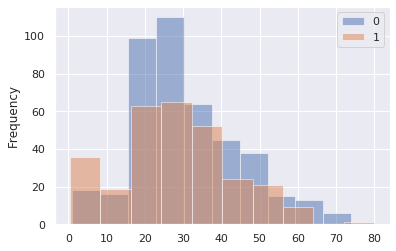

In [12]:
data.groupby('Survived')['Age'].plot(kind='hist', alpha=0.5)
plt.legend()

In [13]:
data_class1= data[data['Pclass']==1]
data_class1['Age_ave']=data[data['Pclass']==1]['Age'].median()
data_class1['Age'].fillna(data_class1['Age_ave'], inplace=True)
data_class1.drop(['Age_ave'], axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
data_class2= data[data['Pclass']==2]
data_class2['Age_ave']=data[data['Pclass']==2]['Age'].median()
data_class2['Age'].fillna(data_class2['Age_ave'], inplace=True)
data_class2.drop(['Age_ave'], axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
data_class3= data[data['Pclass']==3]
data_class3['Age_ave']=data[data['Pclass']==3]['Age'].median()
data_class3['Age'].fillna(data_class3['Age_ave'], inplace=True)
data_class3.drop(['Age_ave'], axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
data=pd.concat([data_class1, data_class2, data_class3])
data.sort_index(inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_flg
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,P
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S,W
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [17]:
data['Cabin_flg']=data['Cabin'].map(lambda x: str(x)[0])
data.groupby('Pclass')['Cabin_flg'].value_counts()

Pclass  Cabin_flg
1       C             59
        B             47
        n             40
        D             29
        E             25
        A             15
        T              1
2       n            168
        F              8
        D              4
        E              4
3       n            479
        F              5
        G              4
        E              3
Name: Cabin_flg, dtype: int64

In [18]:
a=data[data['Cabin_flg']=='A']['Ticket_flg'].value_counts()
b=data[data['Cabin_flg']=='B']['Ticket_flg'].value_counts()
c=data[data['Cabin_flg']=='C']['Ticket_flg'].value_counts()
d=data[data['Cabin_flg']=='D']['Ticket_flg'].value_counts()
e=data[data['Cabin_flg']=='E']['Ticket_flg'].value_counts()
f=data[data['Cabin_flg']=='F']['Ticket_flg'].value_counts()
cabin_ticket =pd.DataFrame({'A':a, 'B':b, 'C':c, 'D':d, 'E':e, 'F':f})
cabin_ticket.T

,1,2,3,5,6,C,F,P,S,W
A,10.0,1.0,1.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN
B,27.0,3.0,NaN,NaN,1.0,NaN,1.0,13.0,NaN,2.0
C,41.0,NaN,3.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN
D,15.0,2.0,9.0,NaN,NaN,NaN,NaN,5.0,2.0,NaN
E,17.0,2.0,3.0,1.0,NaN,NaN,NaN,6.0,2.0,1.0
F,NaN,7.0,4.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN


In [19]:
data.groupby('Survived')['Cabin_flg'].value_counts()

Survived  Cabin_flg
0         n            481
          C             24
          B             12
          A              8
          D              8
          E              8
          F              5
          G              2
          T              1
1         n            206
          B             35
          C             35
          D             25
          E             24
          F              8
          A              7
          G              2
Name: Cabin_flg, dtype: int64

In [20]:
data.groupby('Cabin_flg')['Fare'].mean()

Cabin_flg
A     39.623887
B    113.505764
C    100.151341
D     57.244576
E     46.026694
F     18.696792
G     13.581250
T     35.500000
n     19.157325
Name: Fare, dtype: float64

In [21]:
data['Cabin_flg'][data['Cabin_flg']=='n']=np.nan
data['Cabin_flg'][data['Cabin_flg']=='T']='A'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
def cabin(x):
  if x>100:
    return data['Cabin_flg'].fillna('B', inplace=True)
  elif x>60:
    return data['Cabin_flg'].fillna('C', inplace=True)
  elif x>50:
    return data['Cabin_flg'].fillna('D', inplace=True)
  elif x>40:
    return data['Cabin_flg'].fillna('E', inplace=True)
  elif x>20:
    return data['Cabin_flg'].fillna('A', inplace=True)
  elif x<13:
    return data['Cabin_flg'].fillna('G', inplace=True)
  else:
    return data['Cabin_flg'].fillna('F',inplace=True)

for i in data['Fare']:
  cabin(i)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_flg,Cabin_flg
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A,G
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,P,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,S,G
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2,G
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S,W,G
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,C


In [0]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [24]:
data.dropna(inplace=True)
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Ticket_flg    0
Cabin_flg     0
dtype: int64

In [25]:
y=data['Survived']
X= data.drop('Survived', axis=1)
X_dummies=pd.get_dummies(X)
X_dummies

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Ticket_flg_1,Ticket_flg_2,Ticket_flg_3,Ticket_flg_4,Ticket_flg_5,Ticket_flg_6,Ticket_flg_7,Ticket_flg_8,Ticket_flg_9,Ticket_flg_A,Ticket_flg_C,Ticket_flg_F,Ticket_flg_L,Ticket_flg_P,Ticket_flg_S,Ticket_flg_W,Cabin_flg_A,Cabin_flg_B,Cabin_flg_C,Cabin_flg_D,Cabin_flg_E,Cabin_flg_F,Cabin_flg_G
0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
888,3,24.0,1,2,23.4500,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [26]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [27]:
data.groupby('Pclass')['Fare'].median()

Pclass
1    58.6896
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [0]:
test['Fare'].fillna(8,inplace=True)

In [29]:
test['Ticket_flg']=test['Ticket'].map(lambda x: str(x)[:1])
test['Ticket_flg'].value_counts()

3    128
2     95
1     64
P     33
S     33
C     30
A     13
W      6
F      6
7      4
6      3
L      1
9      1
4      1
Name: Ticket_flg, dtype: int64

In [30]:
# preprocessing test data
test_class1= test[test['Pclass']==1]
test_class1['Age_med']=test[test['Pclass']==1]['Age'].median()
test_class1['Age'].fillna(test_class1['Age_med'], inplace=True)
test_class1.drop(['Age_med'], axis=1,inplace=True)

test_class2= test[test['Pclass']==2]
test_class2['Age_med']=test[test['Pclass']==2]['Age'].median()
test_class2['Age'].fillna(test_class2['Age_med'], inplace=True)
test_class2.drop(['Age_med'], axis=1,inplace=True)

test_class3= test[test['Pclass']==3]
test_class3['Age_med']=test[test['Pclass']==3]['Age'].median()
test_class3['Age'].fillna(test_class3['Age_med'], inplace=True)
test_class3.drop(['Age_med'], axis=1,inplace=True)

test=pd.concat([test_class1, test_class2, test_class3])
test.sort_index(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/u

In [31]:
test['Cabin_flg']=test['Cabin'].map(lambda x: str(x)[0])
test['Cabin_flg'][tset['Cabin_flg']=='n']=np.nan

NameError: ignored

In [0]:
def cabin(x):
  if x>100:
    return test['Cabin_flg'].fillna('B', inplace=True)
  elif x>60:
    return test['Cabin_flg'].fillna('C', inplace=True)
  elif x>50:
    return test['Cabin_flg'].fillna('D', inplace=True)
  elif x>40:
    return test['Cabin_flg'].fillna('E', inplace=True)
  elif x>20:
    return test['Cabin_flg'].fillna('A', inplace=True)
  elif x<13:
    return test['Cabin_flg'].fillna('G', inplace=True)
  else:
    return test['Cabin_flg'].fillna('F',inplace=True)

for i in test['Fare']:
  cabin(i)
test

In [0]:
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [0]:
test.isnull().sum()

In [0]:
X_test_dummies=pd.get_dummies(test)
X_test_dummies